In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2



## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
from our_helpers import *
DATA_TRAIN_PATH = "train.csv" # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# Clean DataSet 

## Do your thing crazy machine learning thing here :) ...

#Move discrete vector out (column 22) and replace with 4 columns

In [5]:

vector=tX[::,22]
X=np.delete(tX,22,1)
mat=np.zeros((250000,4))
for i in (range(len(vector))):
    j=int(vector[i])
    mat[i,j]=1  
X=np.concatenate((X,mat),1)
 
#feature_plot(X)


In [6]:
#Clean up by mean and observe

In [7]:
mean_replaced_X=np.zeros((X.shape[0],X.shape[1]))
median_replaced_X=np.zeros((X.shape[0],X.shape[1]))
for i in (range(X.shape[1])):
    mean_replaced_X[::,i]=clean_up_invalid_values_mean(X[::,i])
    median_replaced_X[::,i]=clean_up_invalid_values_median(X[::,i])
#fig1=feature_plot(mean_replaced_X)
#plt.savefig('mean_replaced_data.png')
#fig2=feature_plot(median_replaced_X)
#plt.savefig('median_replaced_data.png')

# Correlation Vectors before normalization 

33
(array([14, 23, 24, 26], dtype=int64),)


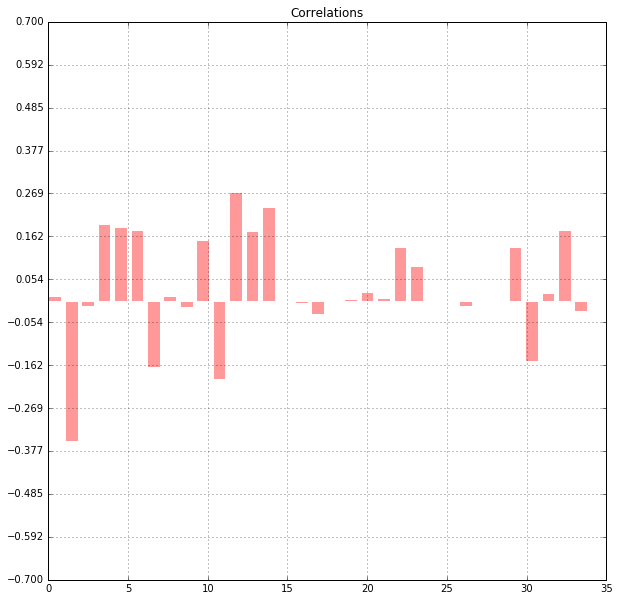

[ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1.
  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.]
[ 0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.
  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  1.  1.  1.]
[ 1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  1.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.]


In [123]:
from our_helpers import *

V=compute_correlation(mean_replaced_X,y)
print(len(V))
uncorrelated=(abs(V[::])< 0.001)
uncorrelated_feature=np.where(uncorrelated==True)
print(uncorrelated_feature)
correlation_plot(V,mean_replaced_X.shape[1],'Correlations')
#Features  14,23,24, and 26 appear to be uncorrelated with output result

so=np.ones(250000)*-1
print(y[0:50:1])
print(mean_replaced_X[0:50:1,29])
#print(mean_replaced_X[0:50:1,30])
print(mean_replaced_X[0:50:1,31])
#print(mean_replaced_X[0:50:1,32])








# Normalize Data between 0 & 1

In [9]:
#Set Constraint on correlation value
Const=0.001
normalized_mean_replaced_X=normalize_data(mean_replaced_X)
V=compute_correlation(normalized_mean_replaced_X,y)
uncorrelated=(abs(V[::])< Const)
uncorrelated_feature=np.where(uncorrelated==True)
print(uncorrelated_feature)
#correlation_plot(V,mean_replaced_X.shape[1],'Correlations')


(array([14, 23, 24, 26], dtype=int64),)


# Standardize the Data

In [20]:
from helpers import *
standardized_X=standardize(normalized_mean_replaced_X)

# Ridge Regression

In [58]:
from ToolBox import *
from costs import *
lambdas = np.logspace(-3, 1, 10)   
w_results=np.zeros((len(lambdas),standardized_X.shape[1]))

for ind, degree in enumerate(lambdas):
    weight=ridge_regression(y,standardized_X, lambdas[ind])
    rmse_tr=compute_loss_MSE(y,standardized_X, weight)
    #print("weight= \n {w} , \n RMSEtr={r}, \n lambda={la}\n".format(w=weight,r=rmse_tr,la=degree) )
    w_results[ind,::]=weight
        #print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
         #p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


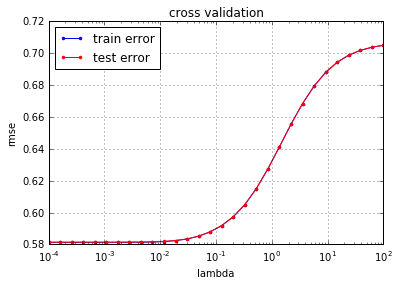

In [87]:
from Cross_Validation import *
def cross_validation_demo():
    seed = 5
    k_fold=4
    lambdas = np.logspace(-4, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
   
    
    loss_tr=np.zeros(k_fold)
    loss_te=np.zeros(k_fold)
    mse_tr = np.zeros(len(lambdas))
    mse_te = np.zeros(len(lambdas))
    mse_var_tr=np.zeros(len(lambdas))
    mse_var_te=np.zeros(len(lambdas))

  
    for ind, lambd in enumerate(lambdas):
        for k in range (k_fold):
            w,loss_tr[k],loss_te[k]=cross_validation(y,standardized_X, k_indices, k, lambd)
            
            #print("weight={w} , RMSEtr={r},RMSEte={rt}, lambda={la}".format(w=w,r=loss_tr[k],rt=loss_te[k],la=lambdas[ind]) )
       
        mse_tr[ind]=np.mean(loss_tr)
        mse_te[ind]=np.mean(loss_te)
        mse_var_tr[ind]=np.var(loss_tr)
        mse_var_te[ind]=np.var(loss_te)

    cross_validation_visualization(lambdas, np.sqrt(mse_tr), np.sqrt(mse_te))

cross_validation_demo()

In [95]:
weight=ridge_regression(y,standardized_X,0.0001)
print(weight.shape)
print(standardized_X.shape)
Youtcome=standardized_X.dot(weight)
print(Youtcome[0:30:1],y[0:30:1])
#print(y[0:30:1])

(34,)
(250000, 34)
[-0.15690051  0.0178801  -0.54574046 -0.59323767 -0.31709637 -0.07558562
  0.26962565  0.27702944 -0.50355735 -0.48107699 -0.82558219  0.22065516
 -0.34270854 -0.42093039 -1.25597881 -0.18631685  0.20551589 -0.19532408
 -0.88024346 -0.86849154 -1.0205052  -0.22004252 -0.35841429  0.25372818
 -0.50684077 -0.37786748 -0.07048428  0.26398606  0.02701633  0.43045155] [ 1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.
 -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1. -1.]


## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = "test.csv" # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)